In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
data_file_path = '/content/drive/MyDrive/data.csv'

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv(data_file_path)
print(dataset.head())

   quality  pre-screening  ma1  ma2  ma3  ma4  ma5  ma6   exudate1   exudate2  \
0        1              1   22   22   22   19   18   14  49.895756  17.775994   
1        1              1   24   24   22   18   16   13  57.709936  23.799994   
2        1              1   62   60   59   54   47   33  55.831441  27.993933   
3        1              1   55   53   53   50   43   31  40.467228  18.445954   
4        1              1   44   44   44   41   39   27  18.026254   8.570709   

    exudate3  exudate4  exudate5  exudate6  exudate7  exudate8  \
0   5.270920  0.771761  0.018632  0.006864  0.003923  0.003923   
1   3.325423  0.234185  0.003903  0.003903  0.003903  0.003903   
2  12.687485  4.852282  1.393889  0.373252  0.041817  0.007744   
3   9.118901  3.079428  0.840261  0.272434  0.007653  0.001531   
4   0.410381  0.000000  0.000000  0.000000  0.000000  0.000000   

   macula_opticdisc_distance  opticdisc_diameter  am_fm_classification  Class  
0                   0.486903        

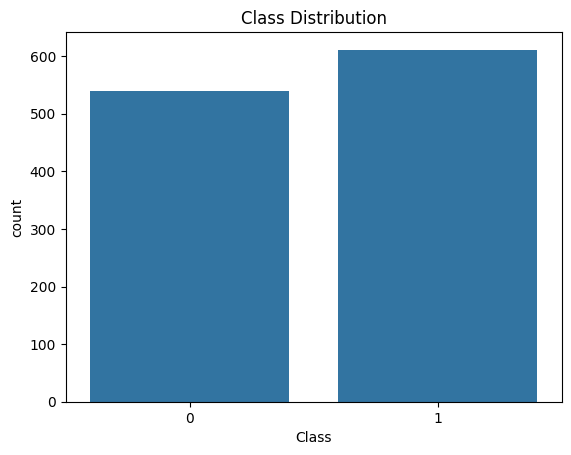

In [ ]:
sns.countplot(x='Class', data=dataset)
plt.title('Class Distribution')
plt.show()

In [ ]:
class_counts = dataset['Class'].value_counts()
class_proportions = class_counts / len(dataset)

proportion_difference = abs(class_proportions.max() - class_proportions.min())

threshold = 0.1

print("Class Counts:")
print(class_counts)

print("\nClass Proportions (%):")
print(class_proportions.apply(lambda x: f"{x:.2%}"))

if proportion_difference <= threshold:
    print("\nThe dataset is balanced.")
    print(f"The difference in class proportions is {proportion_difference:.2%}, which is within the threshold of {threshold:.2%}.")
else:
    print("\nThe dataset is not balanced.")
    print(f"The difference in class proportions is {proportion_difference:.2%}, which exceeds the threshold of {threshold:.2%}.")
    print("Consider using techniques like oversampling, undersampling, or weighted loss functions.")

Class Counts:
Class
1    611
0    540
Name: count, dtype: int64

Class Proportions (%):
Class
1    53.08%
0    46.92%
Name: count, dtype: object

The dataset is balanced.
The difference in class proportions is 6.17%, which is within the threshold of 10.00%.


In [ ]:
missing_values = dataset.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 quality                      0
pre-screening                0
ma1                          0
ma2                          0
ma3                          0
ma4                          0
ma5                          0
ma6                          0
exudate1                     0
exudate2                     0
exudate3                     0
exudate4                     0
exudate5                     0
exudate6                     0
exudate7                     0
exudate8                     0
macula_opticdisc_distance    0
opticdisc_diameter           0
am_fm_classification         0
Class                        0
dtype: int64


In [ ]:
columns_with_zero = [
    'ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6',
    'exudate1', 'exudate2', 'exudate3', 'exudate4',
    'exudate5', 'exudate6', 'exudate7', 'exudate8'
]

null_as_zero = dataset[columns_with_zero] == 0

null_as_zero_count = null_as_zero.sum()
print(null_as_zero_count)

ma1           0
ma2           0
ma3           0
ma4           0
ma5           0
ma6           0
exudate1      0
exudate2      1
exudate3     12
exudate4    111
exudate5    333
exudate6    536
exudate7    697
exudate8    767
dtype: int64


In [ ]:
columns_to_drop = ['exudate6', 'exudate7', 'exudate8']
data = dataset.drop(columns=columns_to_drop)
print(data.head(10))

   quality  pre-screening  ma1  ma2  ma3  ma4  ma5  ma6   exudate1   exudate2  \
0        1              1   22   22   22   19   18   14  49.895756  17.775994   
1        1              1   24   24   22   18   16   13  57.709936  23.799994   
2        1              1   62   60   59   54   47   33  55.831441  27.993933   
3        1              1   55   53   53   50   43   31  40.467228  18.445954   
4        1              1   44   44   44   41   39   27  18.026254   8.570709   
5        1              1   44   43   41   41   37   29  28.356400   6.935636   
6        1              0   29   29   29   27   25   16  15.448398   9.113819   
7        1              1    6    6    6    6    2    1  20.679649   9.497786   
8        1              1   22   21   18   15   13   10  66.691933  23.545543   
9        1              1   79   75   73   71   64   47  22.141784  10.054384   

    exudate3  exudate4  exudate5  macula_opticdisc_distance  \
0   5.270920  0.771761  0.018632             

In [ ]:
columns_with_zero_as_missing = [
    'ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6',
    'exudate1', 'exudate2', 'exudate3', 'exudate4', 'exudate5'
]

for col in columns_with_zero_as_missing:
    median_value = data[data[col] != 0][col].median()

    data[col] = data[col].replace(0, median_value)

print(data.head(10))

   quality  pre-screening  ma1  ma2  ma3  ma4  ma5  ma6   exudate1   exudate2  \
0        1              1   22   22   22   19   18   14  49.895756  17.775994   
1        1              1   24   24   22   18   16   13  57.709936  23.799994   
2        1              1   62   60   59   54   47   33  55.831441  27.993933   
3        1              1   55   53   53   50   43   31  40.467228  18.445954   
4        1              1   44   44   44   41   39   27  18.026254   8.570709   
5        1              1   44   43   41   41   37   29  28.356400   6.935636   
6        1              0   29   29   29   27   25   16  15.448398   9.113819   
7        1              1    6    6    6    6    2    1  20.679649   9.497786   
8        1              1   22   21   18   15   13   10  66.691933  23.545543   
9        1              1   79   75   73   71   64   47  22.141784  10.054384   

    exudate3  exudate4  exudate5  macula_opticdisc_distance  \
0   5.270920  0.771761  0.018632             

In [ ]:
standardize_data = data.copy()
columns_to_normalize = data.columns.difference(['Class'])
print("\n Standardized data:\n", standardize_data.head(10))


 Standardized data:
    quality  pre-screening  ma1  ma2  ma3  ma4  ma5  ma6   exudate1   exudate2  \
0        1              1   22   22   22   19   18   14  49.895756  17.775994   
1        1              1   24   24   22   18   16   13  57.709936  23.799994   
2        1              1   62   60   59   54   47   33  55.831441  27.993933   
3        1              1   55   53   53   50   43   31  40.467228  18.445954   
4        1              1   44   44   44   41   39   27  18.026254   8.570709   
5        1              1   44   43   41   41   37   29  28.356400   6.935636   
6        1              0   29   29   29   27   25   16  15.448398   9.113819   
7        1              1    6    6    6    6    2    1  20.679649   9.497786   
8        1              1   22   21   18   15   13   10  66.691933  23.545543   
9        1              1   79   75   73   71   64   47  22.141784  10.054384   

    exudate3  exudate4  exudate5  macula_opticdisc_distance  \
0   5.270920  0.771761 

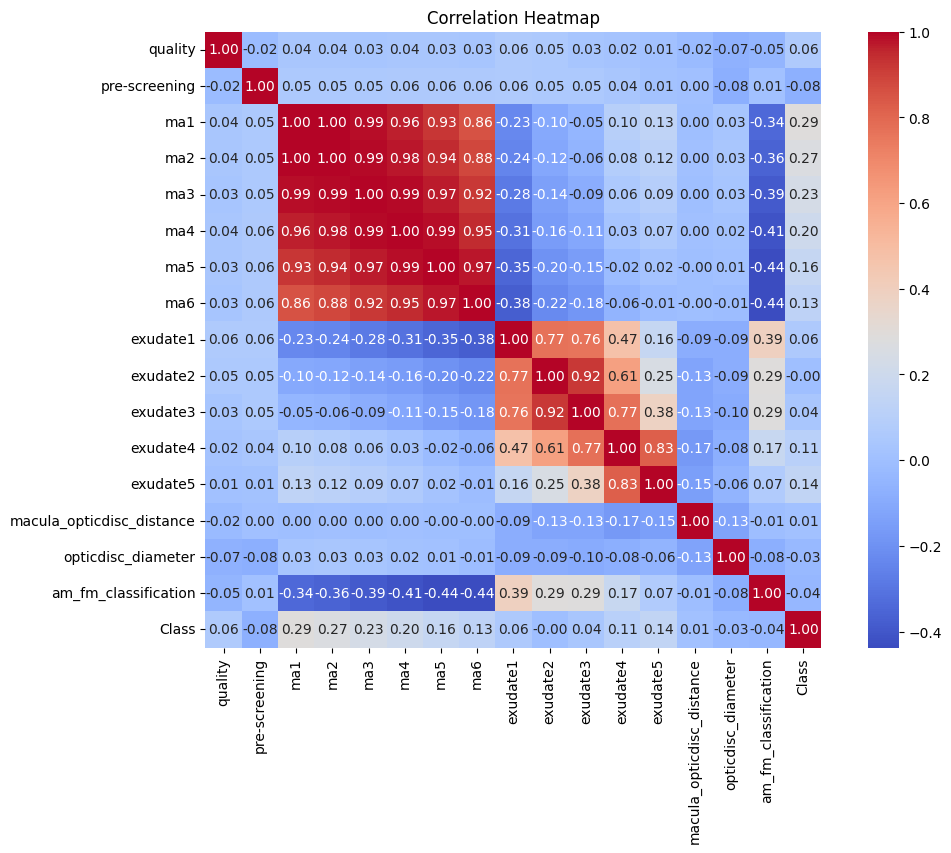

In [ ]:
correlation_matrix = standardize_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
quantiles = standardize_data.quantile([0.25, 0.5, 0.75])

import numpy as np
corr_values = correlation_matrix.abs()
np.fill_diagonal(corr_values.values, np.nan)

high_corr_pairs = corr_values.stack().sort_values(ascending=False)
print("Most Correlated Features:\n", high_corr_pairs.head(10))

low_corr_pairs = corr_values.stack().sort_values(ascending=True)
print("Least Correlated Features:\n", low_corr_pairs.head(10))

target_corr = correlation_matrix['Class'].abs().sort_values(ascending=False)
threshold = target_corr.quantile(0.30)

Most Correlated Features:
 ma1  ma2    0.996177
ma2  ma1    0.996177
     ma3    0.994221
ma3  ma2    0.994221
ma4  ma3    0.991821
ma3  ma4    0.991821
ma4  ma5    0.988294
ma5  ma4    0.988294
ma1  ma3    0.985730
ma3  ma1    0.985730
dtype: float64
Least Correlated Features:
 ma1                        macula_opticdisc_distance    0.000001
macula_opticdisc_distance  ma1                          0.000001
exudate2                   Class                        0.000250
Class                      exudate2                     0.000250
ma3                        macula_opticdisc_distance    0.000387
macula_opticdisc_distance  ma3                          0.000387
ma4                        macula_opticdisc_distance    0.001520
macula_opticdisc_distance  ma4                          0.001520
ma5                        macula_opticdisc_distance    0.001725
macula_opticdisc_distance  ma5                          0.001725
dtype: float64


In [ ]:
important_features = target_corr[target_corr > threshold].index.tolist()
print("Selected Important Features based on Threshold:\n", important_features)

important_features_df = standardize_data[important_features]
print(important_features_df.head())

Selected Important Features based on Threshold:
 ['Class', 'ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'exudate5', 'ma6', 'exudate4', 'pre-screening', 'quality', 'exudate1']
   Class  ma1  ma2  ma3  ma4  ma5  exudate5  ma6  exudate4  pre-screening  \
0      0   22   22   22   19   18  0.018632   14  0.771761              1   
1      0   24   24   22   18   16  0.003903   13  0.234185              1   
2      1   62   60   59   54   47  1.393889   33  4.852282              1   
3      0   55   53   53   50   43  0.840261   31  3.079428              1   
4      1   44   44   44   41   39  0.095694   27  0.679694              1   

   quality   exudate1  
0        1  49.895756  
1        1  57.709936  
2        1  55.831441  
3        1  40.467228  
4        1  18.026254  


In [ ]:
if not all(dataset['Class'].isin([0, 1])):
    raise ValueError("Target variable `Class` should only contain binary values 0 and 1.")

X = dataset.drop(columns=['Class'])
y = dataset['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logreg = LogisticRegression(max_iter=5000, solver='lbfgs', random_state=42)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(logreg, X_scaled, y, cv=kfold, scoring='accuracy')
print(f'Cross-Validated Accuracy (10-fold): {cv_results.mean():.4f}')

Cross-Validated Accuracy (10-fold): 0.7237


In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [ ]:
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [ ]:
train_pred = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

if abs(train_accuracy - test_accuracy) > 0.10:
    print("The model is likely overfitted.")
elif train_accuracy < 0.70 and test_accuracy < 0.70:
    print("The model is likely underfitted.")
else:
    print("The model is performing well.")

Training Accuracy: 0.75
Test Accuracy: 0.77
The model is performing well.


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC Score: {roc_auc:.2f}')

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 0.85
Recall: 0.70
F1 Score: 0.77
AUC-ROC Score: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76       103
           1       0.85      0.70      0.77       128

    accuracy                           0.77       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.78      0.77      0.77       231



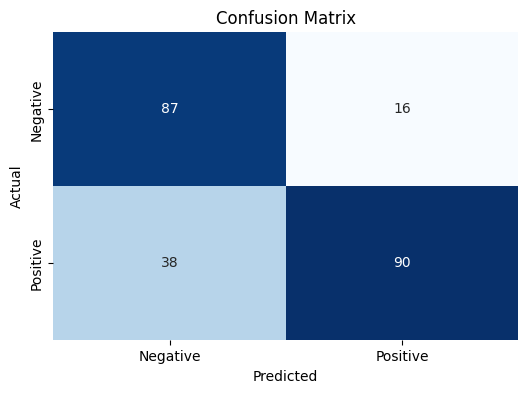

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

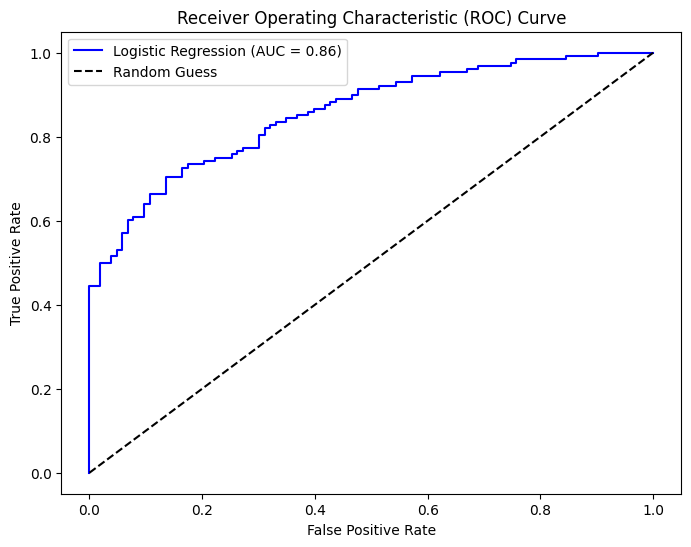

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()